In [2]:
%matplotlib inline

import seaborn as sns
import pandas as pd

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
tables = pd.read_html('http://www.footballdb.com/teams/nfl/seattle-seahawks/history', header=0)
history = tables[0]
history.sort_values(by='Year', inplace=True)
history.set_index('Year', inplace=True)
history = history[['W', 'L', 'T', 'PF', 'PA']]
history['GamesPlayed'] = history['W'] + history['L'] + history['T']
history['WinPct'] = history['W'] / history['GamesPlayed']
history['LossPct'] = history['L'] / history['GamesPlayed']
history['TotalPoints'] = history['PF'] + history['PA']
history['PFPct'] = history['PF'] / history['TotalPoints']
history['PAPct'] = history['PA'] / history['TotalPoints']
history = history[['W', 'L', 'WinPct', 'LossPct', 'PF', 'PA', 'PFPct', 'PAPct', 'GamesPlayed']]
history.head()

,W,L,WinPct,LossPct,PF,PA,PFPct,PAPct,GamesPlayed
Year,,,,,,,,,
1976,2,12,0.142857,0.857143,229,429,0.348024,0.651976,14
1977,5,9,0.357143,0.642857,282,373,0.430534,0.569466,14
1978,9,7,0.562500,0.437500,345,358,0.490754,0.509246,16
1979,9,7,0.562500,0.437500,378,372,0.504000,0.496000,16
1980,4,12,0.250000,0.750000,291,408,0.416309,0.583691,16


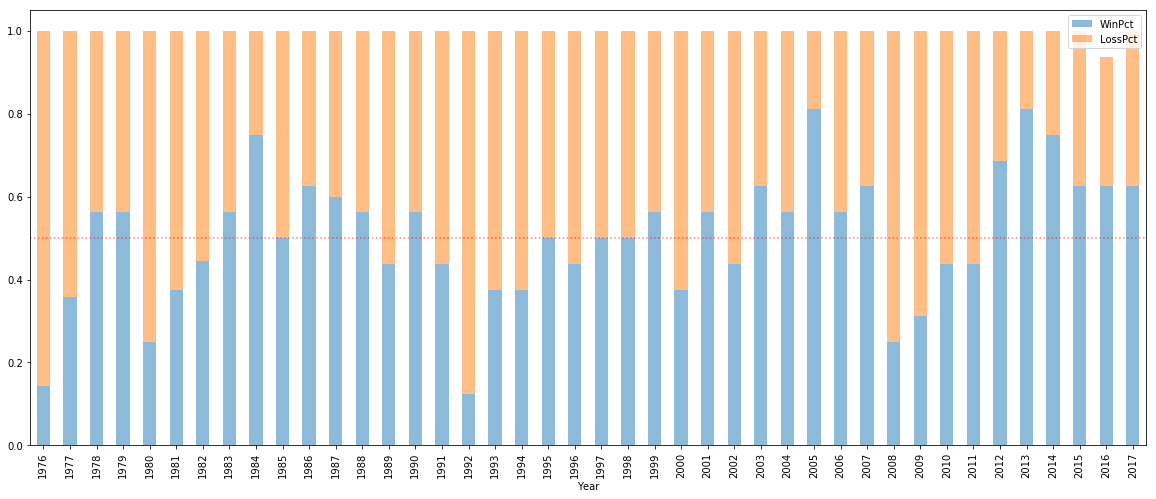

In [4]:
df = history.copy()
df.reset_index(inplace=True)
df = df[['Year', 'WinPct', 'LossPct']]
df.sort_values(by='Year', inplace=True)
df.set_index('Year', inplace=True)
df.plot.bar(stacked=True, figsize=(20,8), alpha=0.5)
plt.axhline(y=0.5, color='r', linestyle=':', alpha=0.5)

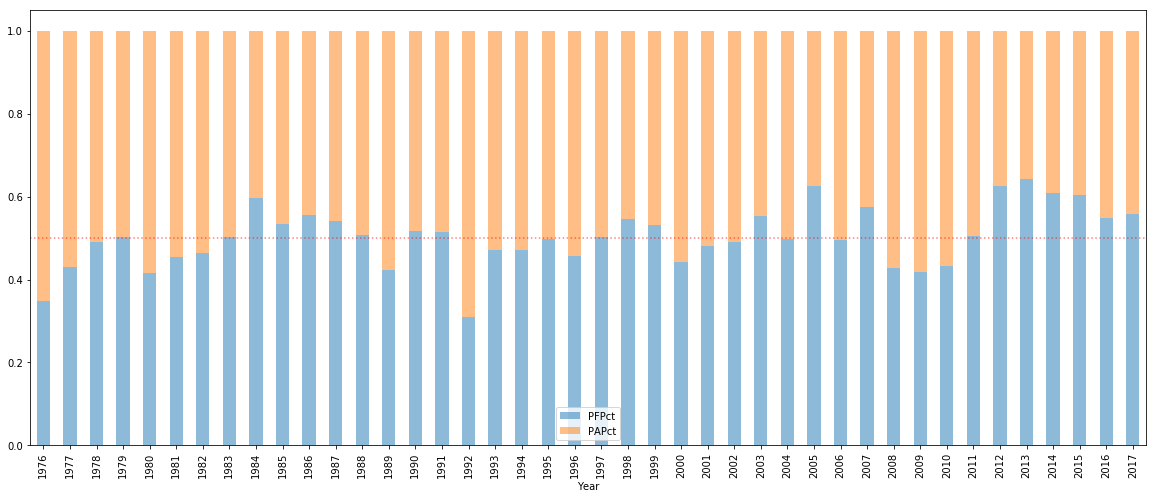

In [5]:
df = history.copy()
df.reset_index(inplace=True)
df = df[['Year', 'PFPct', 'PAPct']]
df.sort_values(by='Year', inplace=True)
df.set_index('Year', inplace=True)
df.plot.bar(stacked=True, figsize=(20,8), alpha=0.5)
plt.axhline(y=0.5, color='r', linestyle=':', alpha=0.5)

In [6]:
corr = history.corr()
corr

,W,L,WinPct,LossPct,PF,PA,PFPct,PAPct,GamesPlayed
W,1.000000,-0.800405,0.940613,-0.939863,0.849706,-0.318875,0.881657,-0.881657,0.366772
L,-0.800405,1.000000,-0.950223,0.951445,-0.508292,0.678712,-0.880508,0.880508,0.261387
WinPct,0.940613,-0.950223,1.000000,-0.998208,0.705564,-0.539815,0.934361,-0.934361,0.037086
LossPct,-0.939863,0.951445,-0.998208,1.000000,-0.702526,0.539679,-0.931950,0.931950,-0.039493
PF,0.849706,-0.508292,0.705564,-0.702526,1.000000,0.091808,0.735881,-0.735881,0.574635
PA,-0.318875,0.678712,-0.539815,0.539679,0.091808,1.000000,-0.589499,0.589499,0.540097
PFPct,0.881657,-0.880508,0.934361,-0.931950,0.735881,-0.589499,1.000000,-1.000000,0.049432
PAPct,-0.881657,0.880508,-0.934361,0.931950,-0.735881,0.589499,-1.000000,1.000000,-0.049432
GamesPlayed,0.366772,0.261387,0.037086,-0.039493,0.574635,0.540097,0.049432,-0.049432,1.000000


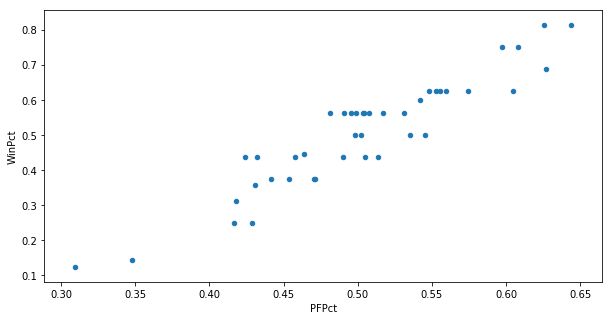

In [7]:
history.plot.scatter(x='PFPct', y='WinPct', figsize=(10,5))

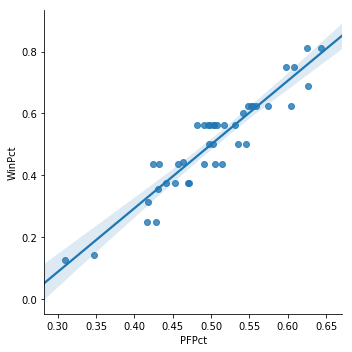

In [15]:
sns.lmplot(x='PFPct',y='WinPct',data=history,fit_reg=True)

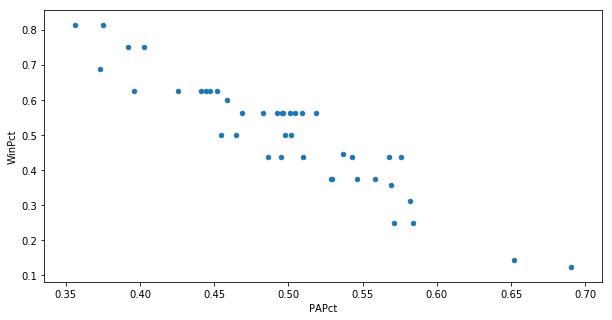

In [8]:
history.plot.scatter(x='PAPct', y='WinPct', figsize=(10,5))

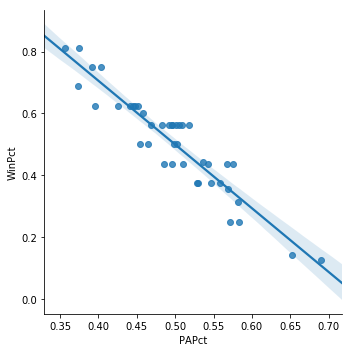

In [16]:
sns.lmplot(x='PAPct',y='WinPct',data=history,fit_reg=True)

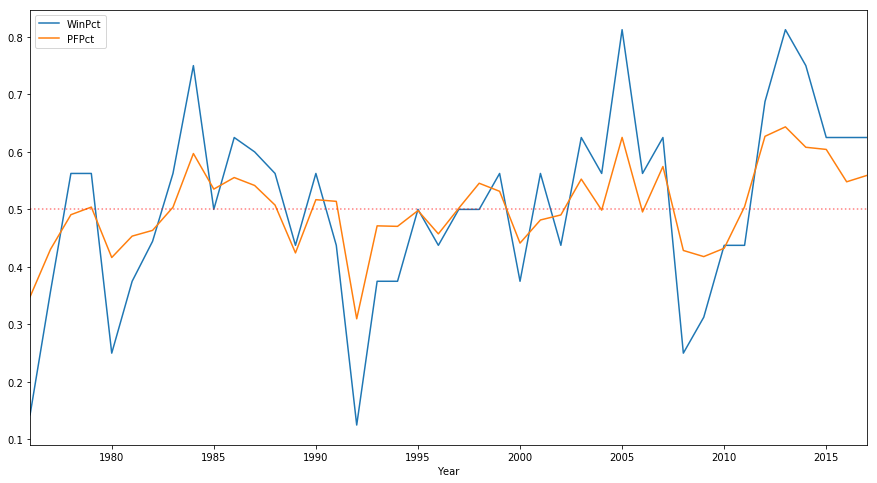

In [9]:
history['WinPct'].plot(figsize=(15,8))
history['PFPct'].plot()
plt.axhline(y=0.5, color='r', linestyle=':', alpha=0.5)
plt.legend()